In [48]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.max_columns', None)

df = pd.read_csv("/Users/admin/Documents/Documents/Le_Wagon/Week_8_Project/Kick_off/FC26_20250921.csv")
df.head(1)

/var/folders/zt/f8flvl8n11jb079fv80d9jlc0000gn/T/ipykernel_340/4237201596.py:18: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/admin/Documents/Documents/Le_Wagon/Week_8_Project/Kick_off/FC26_20250921.csv")


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,252371,/player/252371/jude-bellingham/260004/,26,4,2025-09-19,J. Bellingham,Jude Victor William Bellingham,"CAM, CM",90,94,174500000,320000,22,2003-06-29,186,75,53.0,La Liga,1.0,243.0,Real Madrid,CAM,5.0,NaN,2023-07-01,2029.0,14,England,1318.0,CAM,10.0,Right,4,4,5,NaN,Normal (170-185),Yes,370800000.0,"#Dribbler, #Playmaker , #Clinical finisher, #C...","Relentless +, Low Driven Shot, Gamechanger, In...",80.0,86.0,83.0,90.0,78.0,85.0,66,88,75,90,77,91,73,68,89,91,81,80,83,91,83,86,85,94,80,87,85,82,91,90,74,90,77,79,77,14,11,10,5,8,NaN,86+3,86+3,86+3,87+0,89+0,89+0,89+0,87+0,89+3,89+3,89+3,87+3,89+3,89+3,89+3,87+3,83+3,85+3,85+3,85+3,83+3,82+3,81+3,81+3,81+3,82+3,18+3,https://cdn.sofifa.net/players/252/371/26_120.png


# Drop GK

In [49]:
df = df[~df['player_positions'].str.contains('GK', na=False)]

# Add syntahtic data points

In [50]:
# add syntatic data points
#syn = pd.DataFrame({
    #'overall':[96,97,98,99],
    #'potential':[97,98,99,99],
    #'pace':[95,97,98,99],
    #'shooting':[95,97,98,99],
    #'passing':[94,96,98,99],
    #'dribbling':[96,98,99,99],
    #'defending':[85,88,90,92],
    #'physic':[92,95,97,99],
    #'value_eur':[200_000_000, 240_000_000, 290_000_000, 340_000_000]
#})

#df = pd.concat([df, syn], ignore_index=True)

# Feature selection

In [51]:
df = df[df['value_eur'] != 0]

In [52]:
y = np.log(df["value_eur"].astype("float64").values)

In [53]:
X_features = ['age', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
        'skill_moves', 'weak_foot']

In [54]:
X = df[X_features]
X.head(1)

,age,pace,shooting,passing,dribbling,defending,physic,skill_moves,weak_foot
0,22,80.0,86.0,83.0,90.0,78.0,85.0,4,4


In [55]:
#add pipeline for numeric features

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # replaces NaNs with the median per column
    ("scaler", RobustScaler())                     # scales all features into [0, 1]
])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 3) MLP model (same as your friend’s settings)
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.10,
    n_iter_no_change=20,
    verbose=False
)

# --- 4) Full pipeline: preprocess -> MLP
pipe = Pipeline([
    ("prep", numeric_pipe),
    ("mlp", mlp)
])


In [57]:
# --- 6) Train/test split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 7) Fit
print(f"Training 3-Layer MLP... Input dim = {X_tr.shape[1]}")
pipe.fit(X_tr, y_tr)

# --- 8) Evaluate
y_pred = pipe.predict(X_te)
r2_tr = r2_score(y_tr, pipe.predict(X_tr))
r2_te = r2_score(y_te, y_pred)
mae_log   = mean_absolute_error(y_te, y_pred)
mse   = mean_squared_error(y_te, y_pred)
rmse  = np.sqrt(mse)

mae = np.exp(mae_log)             # -> array([3.02e+09])  ≈ €3.0bn


print("\n=== MLP MODEL PERFORMANCE ===")
print(f"Train R²: {r2_tr:.4f}")
print(f"Test  R²: {r2_te:.4f}")
print(f"MAE:      {mae:,.2f} EUR")
print(f"RMSE:     {rmse:,.2f} EUR")


Training 3-Layer MLP... Input dim = 9

=== MLP MODEL PERFORMANCE ===
Train R²: 0.9623
Test  R²: 0.9584
MAE:      1.22 EUR
RMSE:     0.25 EUR


In [58]:
example = pd.DataFrame([{
    'age': 23, 'pace': 91, 'shooting': 88, 'passing': 83, 'dribbling': 93,
    'defending': 50, 'physic': 69, 'skill_moves': 4, 'weak_foot': 4
}])

In [59]:
import numpy as np

y_pred_log = pipe.predict(example)          # e.g. array([21.81311545])
y_pred_eur = np.exp(y_pred_log)             # -> array([3.02e+09])  ≈ €3.0bn
print(f"€{float(y_pred_eur):,.0f}")

€493,870,274


/var/folders/zt/f8flvl8n11jb079fv80d9jlc0000gn/T/ipykernel_340/2122133618.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"€{float(y_pred_eur):,.0f}")


In [60]:
import pickle

# Save the trained pipeline
with open("DeepL_valuation_model.pkl", "wb") as file:
    pickle.dump(pipe, file)

# Load the saved pipeline
with open("DeepL_valuation_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Get user data from user as new_player_df

pred_value_log = loaded_model.predict(example)
y_pred_eur = np.exp(pred_value_log)
print("Predicted player value (EUR):", y_pred_eur[0])

Predicted player value (EUR): 493870274.0633829


In [61]:
from sklearn.inspection import permutation_importance

# assuming your trained pipeline is called `full`
r = permutation_importance(pipe, X_te, y_te, n_repeats=10, random_state=42)

# Display importance sorted
import pandas as pd
import numpy as np

importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values('importance_mean', ascending=False)

print(importance_df)

       feature  importance_mean  importance_std
5    defending         0.677923        0.018052
0          age         0.361866        0.006544
2     shooting         0.329400        0.010757
4    dribbling         0.228939        0.004444
3      passing         0.150373        0.004411
6       physic         0.046478        0.001218
1         pace         0.022464        0.000798
7  skill_moves         0.003960        0.000375
8    weak_foot         0.000046        0.000184


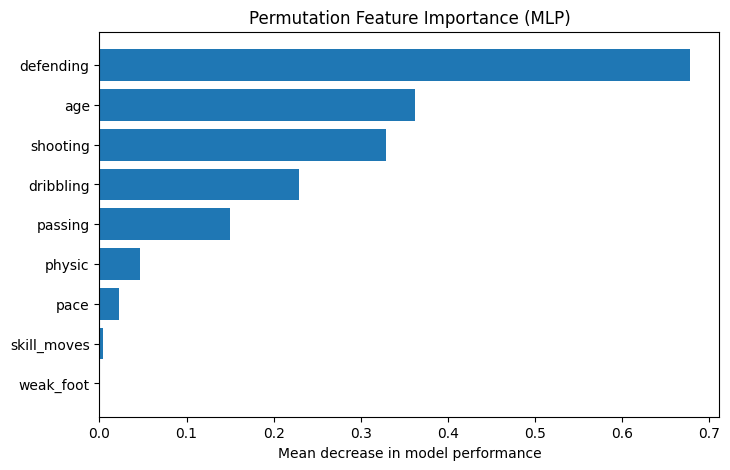

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(importance_df['feature'], importance_df['importance_mean'])
plt.gca().invert_yaxis()
plt.xlabel("Mean decrease in model performance")
plt.title("Permutation Feature Importance (MLP)")
plt.show()